In [113]:
import numpy as np
import itertools
from itertools import chain, combinations
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [190]:
def generate_data(nrows, ncols):
    return np.random.choice([0, 1], size=(nrows, ncols), p=[0.75, 0.25])
    

In [191]:
generate_data(10,5)

array([[1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [4]:
def findsubsets(S,m):
    '''finds subsets of S of size m'''
    return list(itertools.combinations(S, m))

In [5]:
def powerset(seq):
    """
    Returns all the subsets of this set. This is a generator.
    """
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item

In [78]:
def count_distinct(index_list, data, subset_size):
    '''index_list must be a list or array in {0,...,d}.
    Generates all subsets and prints the length subset_size ones.'''
    if (type(index_list) != list):
        index_list = list(index_list)
        
    
    A = data
    print("Number unique items in data: {}".format(len(np.unique(A, axis=0))))
    #print(A)
    n,d = A.shape
    T = index_list
    
    if len(T) > d: # catch error when T is too large
        raise ValueError("T is {} but must be at most {}".format(len(T),d))
    subsets = powerset(T) 
    max_diversity = 0
    max_diversity_indices = []
    counter = 0
    for subcube in powerset(T):
        if len(subcube) == subset_size:
            #counter += 1
            A_subcube = A[:,subcube]
            diversity = len(np.unique(A_subcube, axis=0))
            print("subcube {}, No. unique items {}".format(subcube,\
                                                diversity))
            
            if (diversity >= max_diversity):
                max_diversity_indices.append(subcube)
                max_diversity = diversity       
            
    return max_diversity, max_diversity_indices#, counter        

In [192]:
A = generate_data(10,5)
B = generate_data(10,5)
C = np.c_[A,B]

In [213]:
A

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

In [214]:
B

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0]])

In [207]:
C

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0]])

In [238]:
A_max_div, A_max_div_ids = count_distinct(range(A.shape[1]), A, subset_size=2)

Number unique items in data: 6
subcube [3, 4], No. unique items 4
subcube [2, 4], No. unique items 4
subcube [1, 4], No. unique items 4
subcube [0, 4], No. unique items 3
subcube [2, 3], No. unique items 4
subcube [1, 3], No. unique items 4
subcube [0, 3], No. unique items 3
subcube [1, 2], No. unique items 4
subcube [0, 2], No. unique items 3
subcube [0, 1], No. unique items 3


In [239]:
A_max_div, A_max_div_ids = count_distinct(range(A.shape[1]), A, subset_size=3)

Number unique items in data: 6
subcube [2, 3, 4], No. unique items 6
subcube [1, 3, 4], No. unique items 6
subcube [0, 3, 4], No. unique items 5
subcube [1, 2, 4], No. unique items 5
subcube [0, 2, 4], No. unique items 5
subcube [0, 1, 4], No. unique items 4
subcube [1, 2, 3], No. unique items 5
subcube [0, 2, 3], No. unique items 5
subcube [0, 1, 3], No. unique items 4
subcube [0, 1, 2], No. unique items 4


In [226]:
A_max_div

6

In [227]:
A_max_div_ids

[[2, 3, 4], [1, 3, 4]]

In [228]:
len(A_max_div_ids)

2

In [232]:
B_max_div, B_max_div_ids = count_distinct(range(B.shape[1]), B, subset_size=3)

Number unique items in data: 9
subcube [2, 3, 4], No. unique items 5
subcube [1, 3, 4], No. unique items 5
subcube [0, 3, 4], No. unique items 5
subcube [1, 2, 4], No. unique items 6
subcube [0, 2, 4], No. unique items 5
subcube [0, 1, 4], No. unique items 7
subcube [1, 2, 3], No. unique items 4
subcube [0, 2, 3], No. unique items 4
subcube [0, 1, 3], No. unique items 5
subcube [0, 1, 2], No. unique items 5


In [223]:
B_max_div

4

In [224]:
B_max_div_ids

[[3, 4], [2, 4], [1, 4], [0, 4], [0, 1]]

In [221]:
len(B_max_div_ids)

3

In [235]:
C_max_div, C_max_div_ids = count_distinct(range(C.shape[1]), C, subset_size=4)

Number unique items in data: 10
subcube [6, 7, 8, 9], No. unique items 7
subcube [5, 7, 8, 9], No. unique items 6
subcube [4, 7, 8, 9], No. unique items 7
subcube [3, 7, 8, 9], No. unique items 7
subcube [2, 7, 8, 9], No. unique items 6
subcube [1, 7, 8, 9], No. unique items 6
subcube [0, 7, 8, 9], No. unique items 6
subcube [5, 6, 8, 9], No. unique items 8
subcube [4, 6, 8, 9], No. unique items 8
subcube [3, 6, 8, 9], No. unique items 8
subcube [2, 6, 8, 9], No. unique items 5
subcube [1, 6, 8, 9], No. unique items 7
subcube [0, 6, 8, 9], No. unique items 6
subcube [4, 5, 8, 9], No. unique items 7
subcube [3, 5, 8, 9], No. unique items 8
subcube [2, 5, 8, 9], No. unique items 6
subcube [1, 5, 8, 9], No. unique items 6
subcube [0, 5, 8, 9], No. unique items 6
subcube [3, 4, 8, 9], No. unique items 7
subcube [2, 4, 8, 9], No. unique items 6
subcube [1, 4, 8, 9], No. unique items 7
subcube [0, 4, 8, 9], No. unique items 6
subcube [2, 3, 8, 9], No. unique items 6
subcube [1, 3, 8, 9], No.

In [236]:
C_max_div

9

In [237]:
len(C_max_div_ids)

15

In [206]:
C_max_div_ids

[[6, 7, 8, 9],
 [4, 7, 8, 9],
 [3, 7, 8, 9],
 [5, 6, 8, 9],
 [4, 6, 8, 9],
 [3, 6, 8, 9],
 [3, 5, 8, 9],
 [5, 6, 7, 9],
 [4, 6, 7, 9],
 [3, 6, 7, 9],
 [3, 5, 7, 9],
 [3, 4, 7, 9],
 [4, 5, 6, 9],
 [3, 5, 6, 9],
 [2, 3, 5, 6]]

In [148]:
def plot_frequency(diverse_ids, data_name):
    '''Plots the bar chart showing the frequency of an index in
    subcubes which are diverse.
    Data name should be a string'''
    diverse_multiset = np.ravel(diverse_ids)
    subcube_index, counts = np.unique(np.ravel(diverse_ids), return_counts=True)
    fig,ax = plt.subplots()
    ax.bar(x=subcube_index, height=counts)
    ax.set_xlabel("Index")
    ax.set_xticks(subcube_index)
    ax.set_ylabel("Count in diverse set")
    ax.set_title("Index counts in diverse sets for data {}".format(data_name))

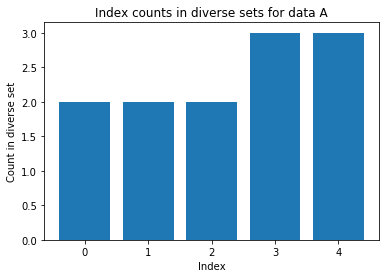

In [208]:
plot_frequency(A_max_div_ids, "A")

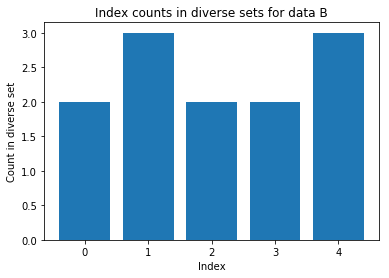

In [209]:
plot_frequency(B_max_div_ids, "B")

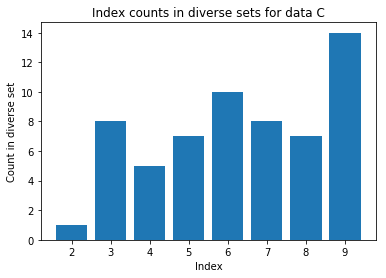

In [210]:
plot_frequency(C_max_div_ids, "C")